# Preamble

## Imports

In [1]:
from functions.colours          import *
from functions.measurement      import *
from functions.optical_modes    import *
from functions.plotting         import *
from functions.propagation      import *
from functions.turbulence       import *
from functions.eigenmodes       import *

from LightPipes                 import *

import aotools
import cmath

pmap, imap, customColoursBGY, customColoursViridis = colours()

# Eigenmodes

## Define Parameters

In [8]:
#Simulation Parameters
size = 45*cm
N = 16 # Resolution (had N=192)
lensSize=size/4 # Radius

#Beam Parameters
wavelength = 633*nm
w0=6.67/1.5*cm # Radius

#Propagataion Params
z=5000*m
num_phase_screens=1

#Turbulence Parameters
C2_n = { # These can be toyed around with
    'WeakestTurb' : 1e-19,
    'WeakerTurb' : 1e-18,
    'WeakTurb' : 1e-17,
    'MidWeakerTurb' : 1.5e-17,
    'MidWeakTurb' : 1e-16,
    'MidTurb' : 1e-15,
    'StrongTurb' : 1e-14,
    'StrongerTurb' : 1e-13 
}
TurbStrength = 'MidWeakTurb'
shift = 5
num_of_fluctuations = 0

# Seed to use to generate initial phase screens
phase_screen_seed = 47


F=Begin(size,wavelength,N)

## Calculate eigenmodes for a turbulent channel

Using 10 threads to propagate beams simulataneously...


100%|██████████| 100/100 [00:00<00:00, 2075.44it/s]


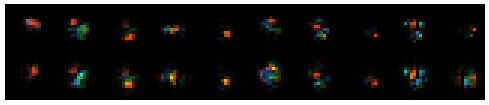

/tmp/ipykernel_182744/3352935406.py:38: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig = plt.figure(1, figsize=(9,3), constrained_layout=True)


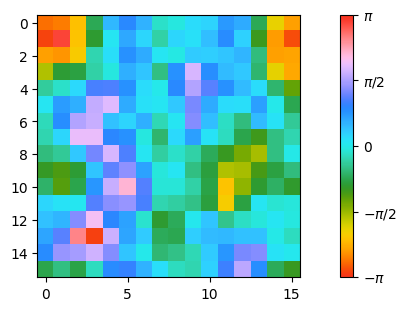

Using 10 threads to propagate beams simulataneously...


100%|██████████| 100/100 [00:00<00:00, 1968.75it/s]


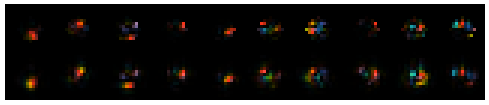

/tmp/ipykernel_182744/3352935406.py:38: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig = plt.figure(1, figsize=(9,3), constrained_layout=True)


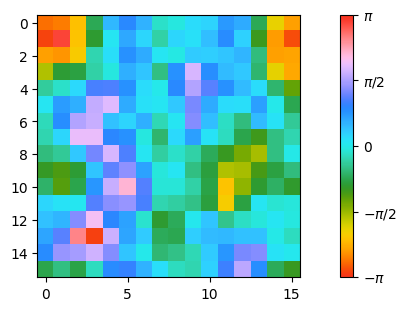

Using 10 threads to propagate beams simulataneously...


100%|██████████| 100/100 [00:00<00:00, 1954.97it/s]


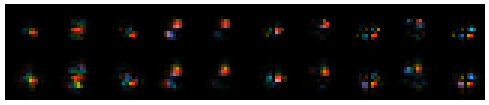

/tmp/ipykernel_182744/3352935406.py:38: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig = plt.figure(1, figsize=(9,3), constrained_layout=True)


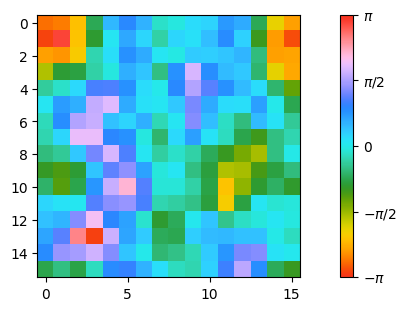

Using 10 threads to propagate beams simulataneously...


100%|██████████| 100/100 [00:00<00:00, 1491.59it/s]


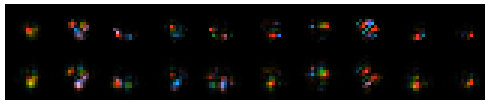

/tmp/ipykernel_182744/3352935406.py:38: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig = plt.figure(1, figsize=(9,3), constrained_layout=True)


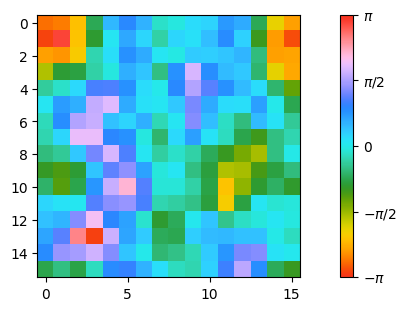

Using 10 threads to propagate beams simulataneously...


100%|██████████| 100/100 [00:00<00:00, 1896.67it/s]


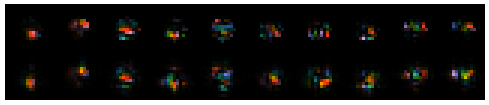

/tmp/ipykernel_182744/3352935406.py:38: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig = plt.figure(1, figsize=(9,3), constrained_layout=True)


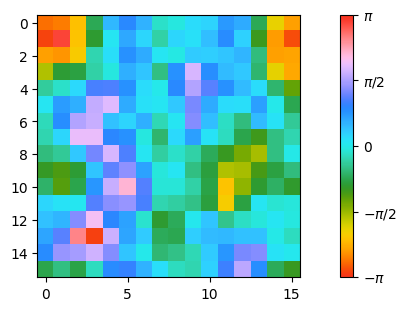

In [9]:
# need to make function to generate turbulent channel where we input the parameters defined above
for _ in range(5):
# Pre-define variables
    abbs = []
    allEigenBeams = []
    allEigenBeamsPropagated = []

    for i in range(num_of_fluctuations+1):
        # Generate/fluctuate turbulent channel
        abbs = gen_turb_channel(size, N, wavelength, z, C2_n[TurbStrength], num_phase_screens, phase_screen_seed, shift, abbs)
        # Extract raw phase screen array
        abbs_screens = extract_screens(abbs)
        # Propagate single pixels through channel
        if __name__ == "__main__":
            FieldsOut, end_fields = parallelpropagatePixels(size, wavelength, N, z, lensSize, abbs_screens)
            # print(f"Successfully processed {len(end_fields)} pixels.")
        # Calculate eigenvalues and eigenvectors
        eigVals, eigVecs = eigen_vals_vecs(end_fields)
        # Determine eigenmodes
        eigenBeams, eigenBeamsPropagated = eigenmodes(size, wavelength, N, z, eigVecs, abbs)
        # Append eigenbeams to list
        allEigenBeams.append(eigenBeams)
        allEigenBeamsPropagated.append(eigenBeamsPropagated)

        # plotting for test
        plot=plot_beam(eigenBeams[:10]+eigenBeamsPropagated[:10],rows=2,dpi=N*3)
        plt.show();plt.close()

        ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
        fig = plt.figure(1, figsize=(9,3), constrained_layout=True)
        

        axes=[]
        images=[]

        # Plot phase screens
        ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
        fig = plt.figure(1, figsize=(9,3), constrained_layout=True)
        axes=[]
        images=[]
        for j in range(num_phase_screens):
            ax = fig.add_subplot(1,num_phase_screens,j+1)
            im = ax.imshow(wrap_to_pi(abbs[j].scrn), cmap=pmap, vmin=-np.pi, vmax=np.pi)
            axes.append(ax)
            images.append(im)
        cbar = fig.colorbar(im)
        cbar.set_ticks(ticks)
        cbar.set_ticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
        plt.show();plt.close()
        
        
    # next steps?

In [4]:
# need to make function to generate turbulent channel where we input the parameters defined above

# Pre-define variables
abbs = []
allEigenBeams = []
allEigenBeamsPropagated = []

for i in range(num_of_fluctuations+1):
    # Generate/fluctuate turbulent channel
    abbs = gen_turb_channel(size, N, wavelength, z, C2_n[TurbStrength], num_phase_screens, phase_screen_seed, shift, abbs)

    # Extract raw phase screen array
    abbs_screens = extract_screens(abbs)
    # Propagate single pixels through channel
    if __name__ == "__main__":
        FieldsOut, end_fields = parallelpropagatePixels(size, wavelength, N, z, lensSize, abbs_screens)
        # print(f"Successfully processed {len(end_fields)} pixels.")
    # Calculate eigenvalues and eigenvectors
    eigVals, eigVecs = eigen_vals_vecs(end_fields)
    # Determine eigenmodes
    eigenBeams, eigenBeamsPropagated = eigenmodes(size, wavelength, N, z, eigVecs, abbs)
    # Append eigenbeams to list
    allEigenBeams.append(eigenBeams)
    allEigenBeamsPropagated.append(eigenBeamsPropagated)

    test_beam=propChannel(OAM(F,2*w0,0),z,abbs=abbs_screens)

    # plotting for test
    plot=plot_beam(eigenBeams[:10]+[test_beam],rows=1,dpi=N*3)
    plt.show();plt.close()

    ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    fig = plt.figure(1, figsize=(9,3), constrained_layout=True)

    axes=[]
    images=[]
    
    
# next steps?

Using 10 threads to propagate beams simulataneously...


100%|██████████| 64/64 [00:00<00:00, 1381.48it/s]


<Figure size 900x300 with 0 Axes>

# Calculate EigenModes

## Create Optical Modes

In [ ]:
#Making Eigenvector optical modes
F=Begin(size,wavelength,N)
eigenBeams=[]
for i in progress(range(100)):
    mode=eigVecs[:,i]
    eigenInt=[abs(val)**2 for val in mode]
    eigenInt=np.pad(np.array(eigenInt).reshape((N,N)),pad_width=int(0), mode='constant', constant_values=0)
    eigenPhase=[cmath.phase(val) for val in mode]
    eigenPhase=np.pad(np.array(eigenPhase).reshape((N,N)),pad_width=int(0), mode='constant', constant_values=0)
    F=SubPhase(SubIntensity(F,eigenInt),eigenPhase)
    eigenBeams.append(F)

eigenBeamPropagated=[propChannel(beam,z,abbs) for beam in progress(eigenBeams)]


100%|██████████| 100/100 [00:00<00:00, 323.77it/s]


### Normalize phase for plotting

In [ ]:
############################
####
####
#### Need to normalize the phase on the propagated eigenmode to be able 
####    to display them next to one another and have consistent phase profiles.
####
############################

In [ ]:
# Loop through eigenbeams and find position with max intensity and then find the phase there. Then find the difference in phase in the
# same position after propagating and subtract the entire array after propagating by this phase difference

for i, eigenBeam in enumerate(eigenBeams):
    intensity = Intensity(eigenBeam,1)
    max_pos = np.unravel_index(intensity.argmax(), intensity.shape)
    phase_diff = np.mod(Phase(eigenBeamPropagated[i]), 2*np.pi)[max_pos] - np.mod(Phase(eigenBeam), 2*np.pi)[max_pos]
    eigenBeamPropagated[i].field *= np.exp(1j * (-phase_diff)) # Subtract phase difference

## Plot Optical Modes

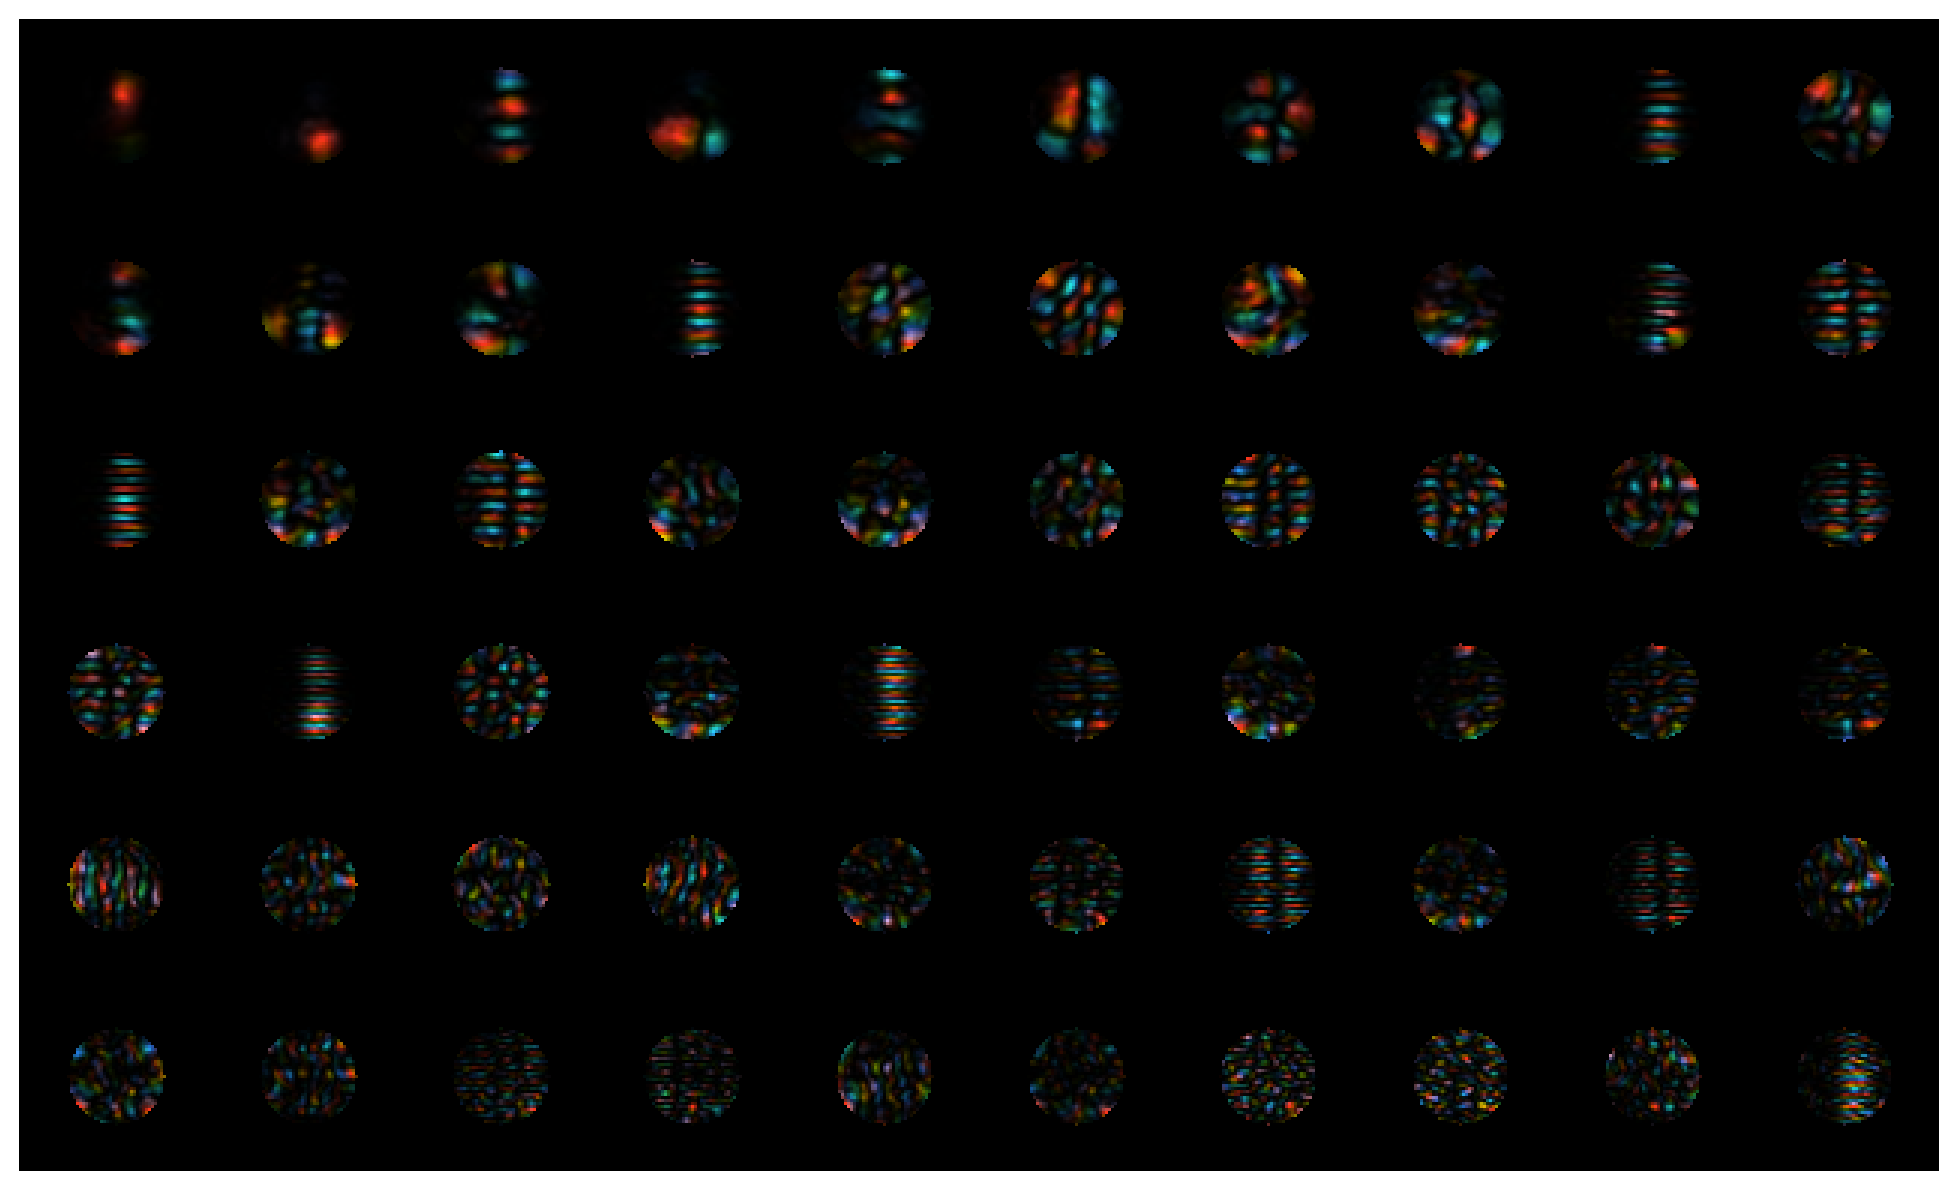

In [ ]:
plot=plot_beam(eigenBeams[:60],rows=6,dpi=N*3)
plt.show();plt.close()

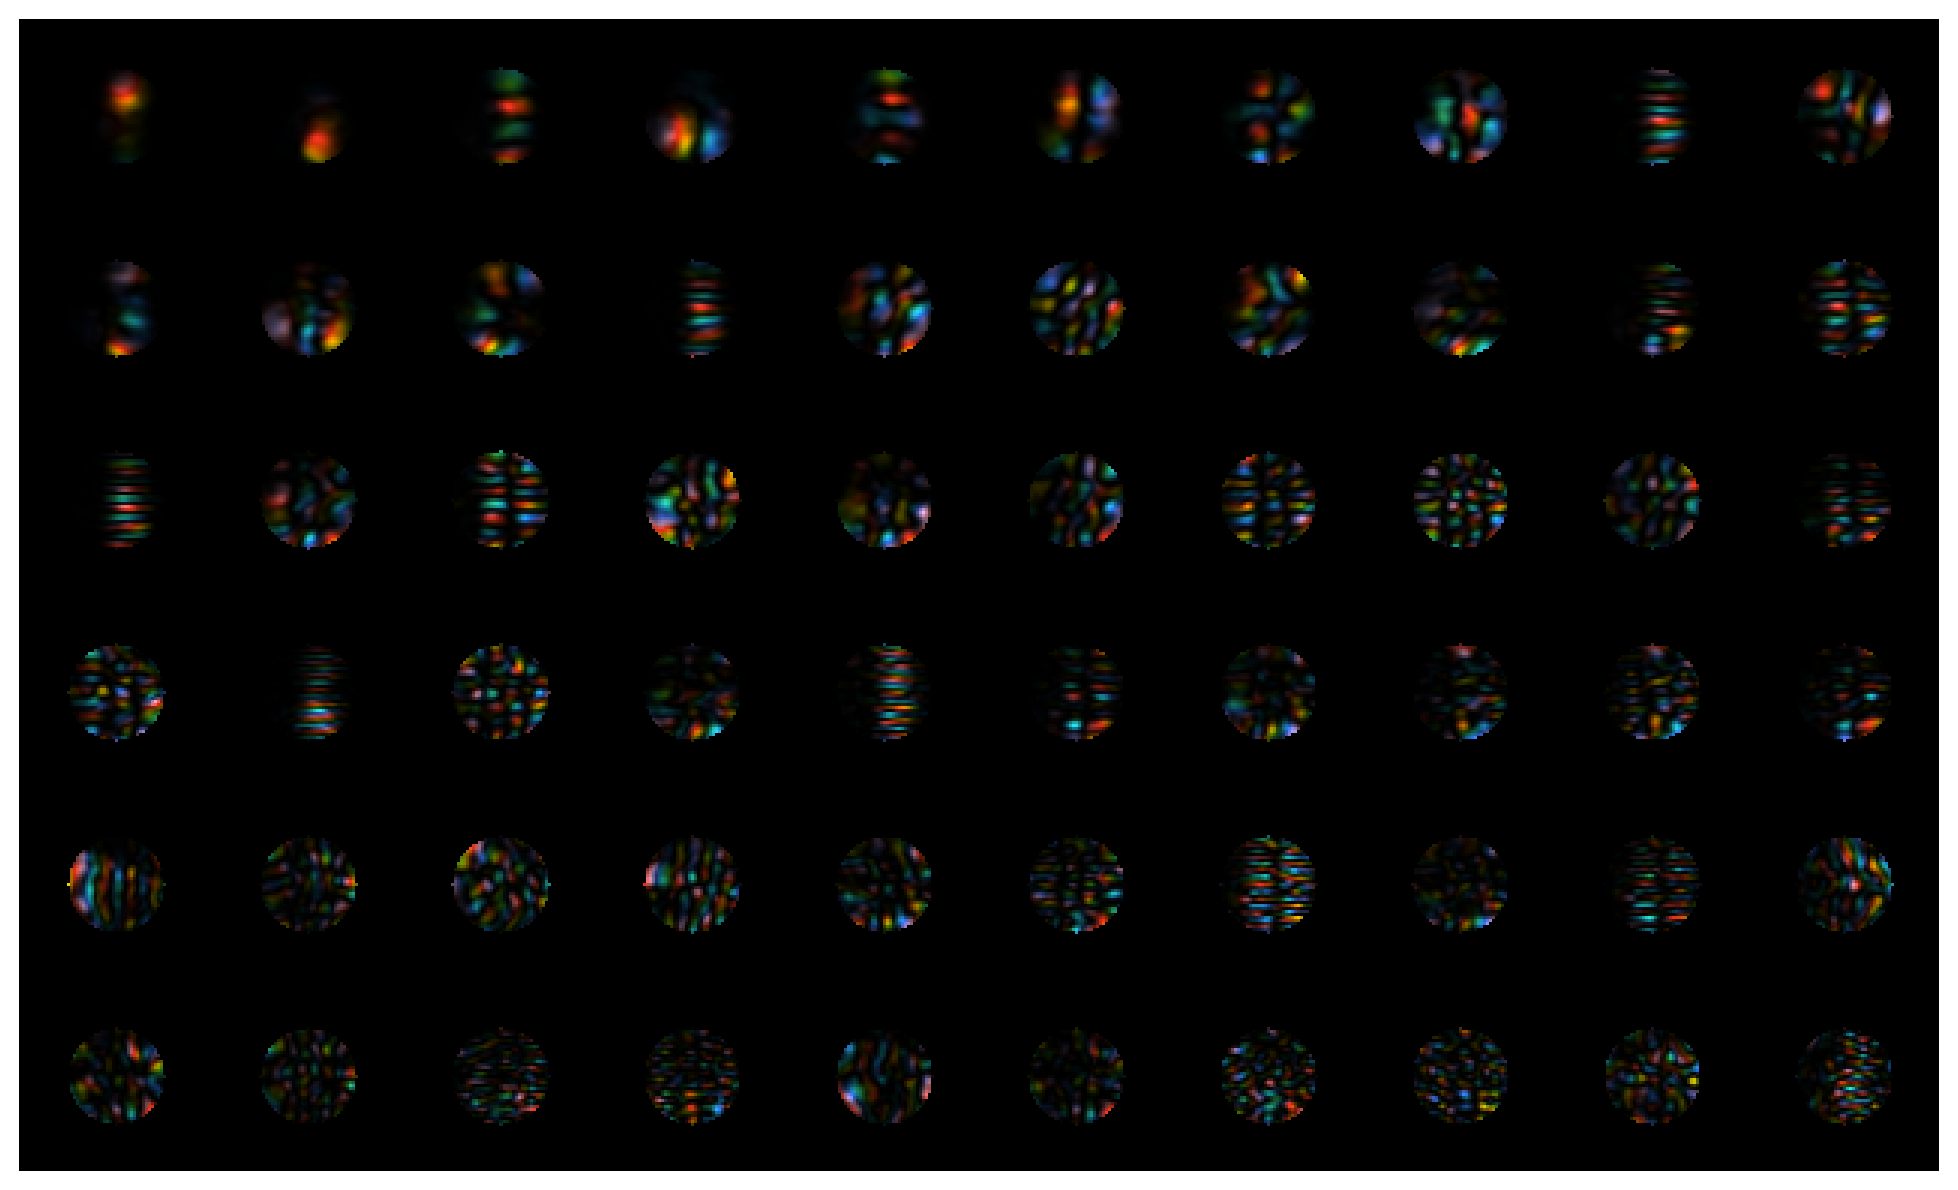

In [ ]:
plot=plot_beam([CircAperture(beam,R=lensSize) for beam in eigenBeamPropagated[:60]],rows=6,dpi=N*3)
plt.show();plt.close()

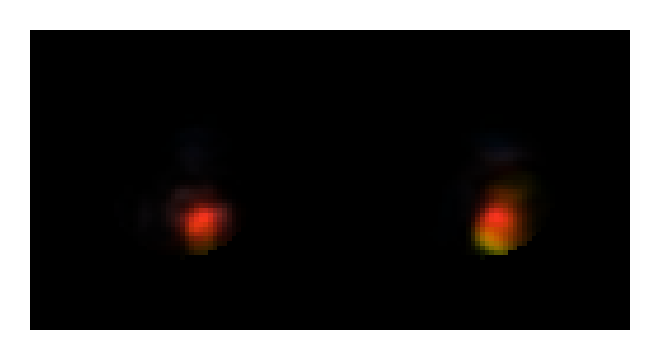

In [ ]:
plt.show(plot_beam([eigenBeams[1],CircAperture(eigenBeamPropagated[1],R=lensSize)]))

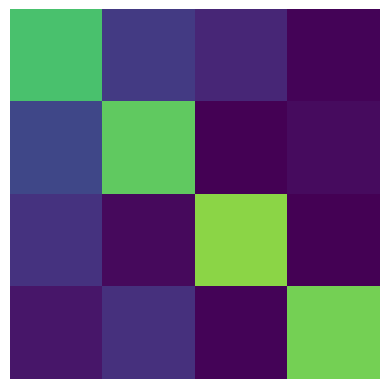

Error rate of 0.2286540138283495 when doing a measurement in the unpropagated Eigenmode basis


In [ ]:
modeNumber=4

bestEigenBeams=eigenBeams[:modeNumber]
bestEigenBeamsPropagated=eigenBeamPropagated[:modeNumber]


plt.show(plotCrosstalk(crosstalk(bestEigenBeams,bestEigenBeamsPropagated)))
print(f'Error rate of {beamsError(bestEigenBeams,bestEigenBeamsPropagated)} when doing a measurement in the unpropagated Eigenmode basis')